# Task 1
 Restaurant Reviews
 1. Analyze the text reviews to identify the most common positive and negative keywords.

In [2]:
%pip install nltk

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     -------------------------------------  41.0/42.0 kB 960.0 kB/s eta 0:00:01
     -------------------------------------- 42.0/42.0 kB 675.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.5 MB 6.5 MB/s eta 0:00:01
   ------------------------- -------------- 1.0/1.5 MB 10.1 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 10.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/268.5 kB ? eta -:--:--
   --------------------------------------- 268.5/268.5 kB 17.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Users\nagap\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [12]:
# import libraries
import pandas as pd

import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer


# download nltk corpus (first time only)
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\nagap\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\nagap\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\nagap\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\nagap\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\nagap\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping grammars\basque_grammars.zip.
[nltk_data]   

True

In [10]:
df1 = pd.read_csv('Dataset .csv')

In [13]:
df1.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [15]:
# create preprocess_text function
def preprocess_text(text):

    # Tokenize the text

    tokens = word_tokenize(text.lower())

    # Remove stop words

    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    # Lemmatize the tokens

    lemmatizer = WordNetLemmatizer()

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a string

    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

# apply the function df

df1['Rating text'] = df1['Rating text'].apply(preprocess_text)
df1

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,good,901


In [30]:
# initialize NLTK sentiment analyzer

analyzer = SentimentIntensityAnalyzer()


# Create empty lists to store positive and negative words
positive_words = []
negative_words = []

# Analyze each review and extract positive and negative keywords
for review in df1['Rating text']:
    tokens = word_tokenize(review)
    sentiment_scores = analyzer.polarity_scores(review)
    if sentiment_scores['compound'] >= 0.2:
        positive_words.extend(tokens)
    elif sentiment_scores['compound'] <= -0.2:
        negative_words.extend(tokens)

# Calculate the most common positive and negative keywords
common_positive_keywords = Counter(positive_words).most_common(10)
common_negative_keywords = Counter(negative_words).most_common(10)

# Print the results
print("Most Common Positive Keywords:")
print(common_positive_keywords)

print("\nMost Common Negative Keywords:")
print(common_negative_keywords)

Most Common Positive Keywords:
[('good', 3179), ('excellent', 301)]

Most Common Negative Keywords:
[('poor', 186)]


2. Calculate the average length of reviews and explore if there is a relationship between review length and rating.

In [20]:

df1['Review Length'] = df1['Rating text'].apply(lambda x: len(x.split()))
Rating_by_Avg_len = df1.groupby('Aggregate rating')['Review Length'].mean()

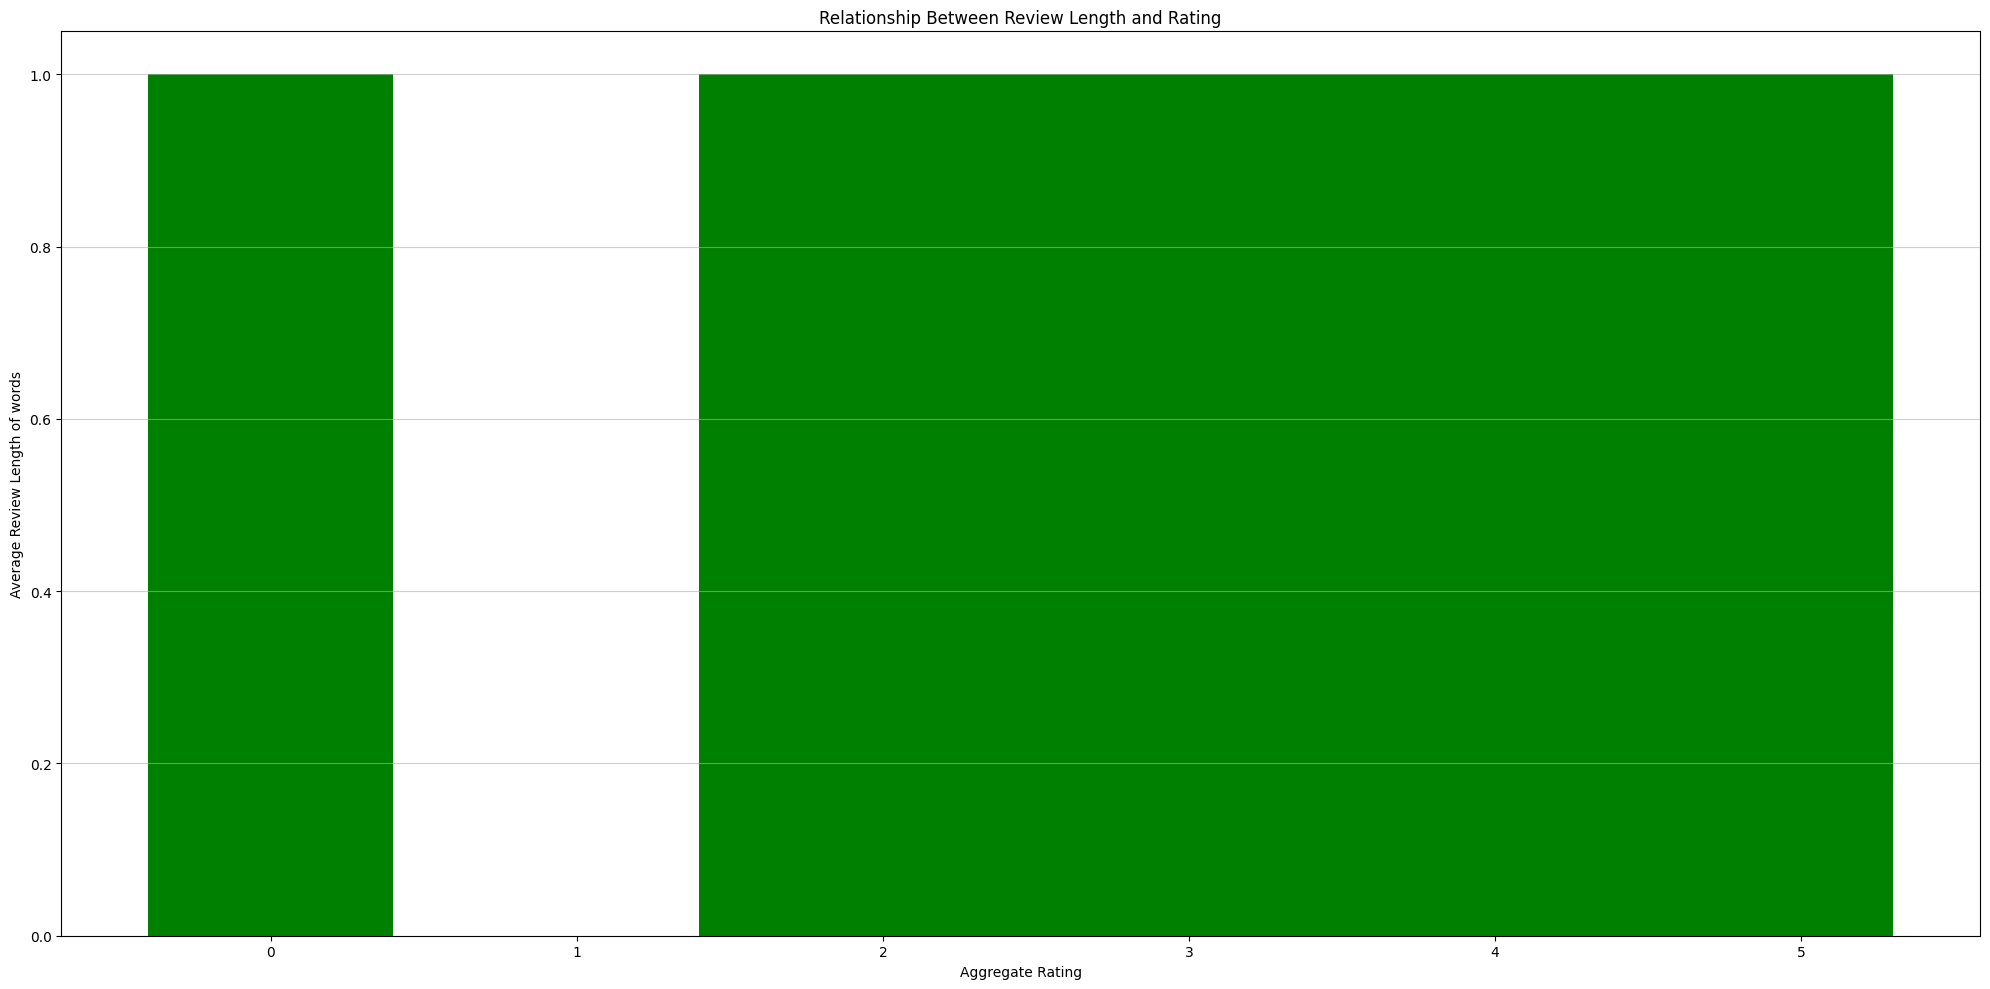

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.bar(Rating_by_Avg_len.index, Rating_by_Avg_len.values, color='green')
plt.xlabel('Aggregate Rating')
plt.ylabel('Average Review Length of words')
plt.title('Relationship Between Review Length and Rating')
plt.grid(axis='y', linestyle='-', alpha=0.6)
plt.tight_layout()
plt.show()

# Task 2
Votes Analysis
1. Identify the restaurants with the highest and lowest number of votes.

In [31]:
ch_votes = df1.groupby("Restaurant Name")["Votes"].sum().reset_index(name="vote count")

In [32]:
sort_votes = ch_votes.sort_values(by ="vote count", ascending=False)
Top_15 = sort_votes.head(15)
Top_15


,Restaurant Name,vote count
663,Barbeque Nation,28142
101,AB's - Absolute Barbecues,13400
6943,Toit,10934
785,Big Chill,10853
2297,Farzi Cafe,10098
6988,Truffles,9682
1510,Chili's,8156
2879,Hauz Khas Social,7931
3261,Joey's Pizza,7807
4902,Peter Cat,7574


In [34]:
Least_15 = sort_votes.tail(15)
Least_15

,Restaurant Name,vote count
4353,Mughlai Darbar Muradabadi,0
2094,Dolphin - The Food Cafe,0
4360,Mukesh Bhojnalaya,0
349,Angaar,0
743,Bhai Ji Dhaba,0
3008,Hotel Green View Palace,0
6210,Sweetcake.in,0
3006,Hotel Delhi 43,0
6224,TAG,0
6220,Szoun Chinese Food,0


2. Analyze if there is a correlation between the number of votes and the rating of a restaurant.

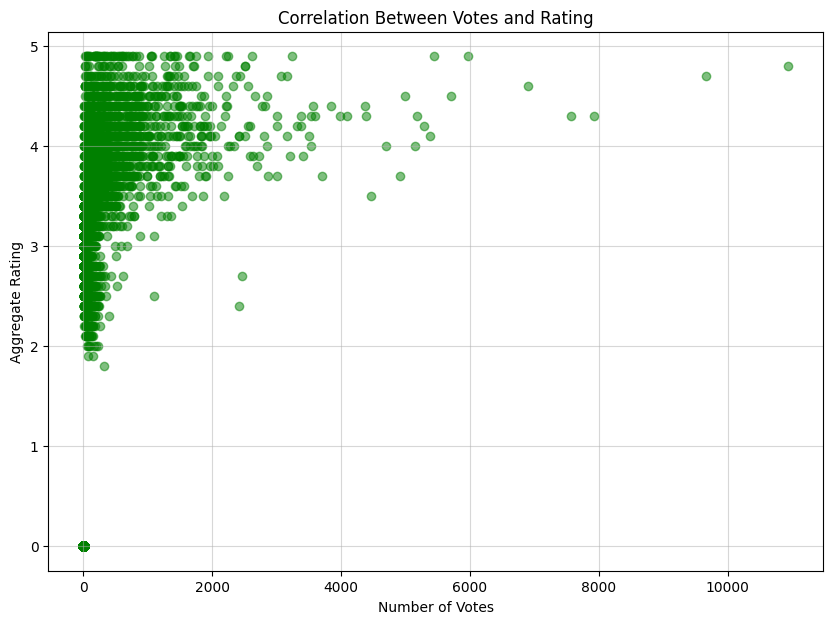

Correlation Between Number of Votes and Rating:                      Votes  Aggregate rating
Votes             1.000000          0.313691
Aggregate rating  0.313691          1.000000


In [41]:
# Create a scatter plot to analyze the correlation
plt.figure(figsize=(10, 7))
plt.scatter(df1['Votes'], df1['Aggregate rating'], alpha=0.5, color='green')
plt.xlabel('Number of Votes')
plt.ylabel('Aggregate Rating')
plt.title('Correlation Between Votes and Rating')
plt.grid(axis='both', linestyle='-', alpha=0.5)
plt.show()

# Calculate the correlation between number of votes and rating
correlation = df1[['Votes','Aggregate rating']].corr()

print("Correlation Between Number of Votes and Rating:", correlation)

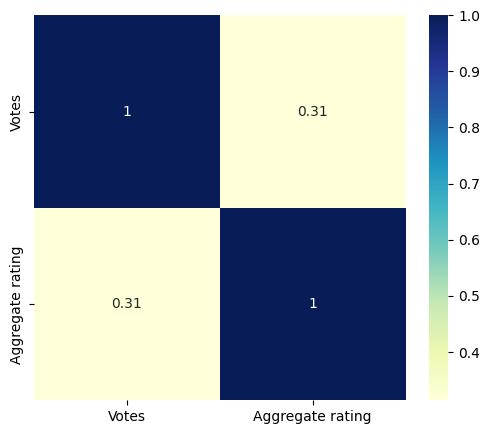

In [42]:
import seaborn as sns
plt.figure(figsize=(6, 5))
sns.heatmap(correlation, cmap="YlGnBu", annot=True)
plt.show()